SVM ( Support Vector Machines)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from imblearn.under_sampling import RandomUnderSampler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report

In [ ]:
df=pd.read_csv("Supervised_Main_Dataset")

In [ ]:
df.head(10)

,Unnamed: 0,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Accident_Duration
0,0,2,2020-01-01,2024-11-14 03:40:00,2024-11-14 04:31:28,34.155567,-118.431243,0.00,At Woodman Ave - Accident.,Sherman Oaks,...,False,False,False,False,False,False,False,False,Night,51.466667
1,1,3,2020-01-01,2024-11-14 01:30:18,2024-11-14 02:14:53,27.489941,-82.470680,1.83,Exit ramp from I-75 Northbound to FL-64 lane b...,Bradenton,...,False,False,False,False,False,False,False,False,Night,44.583333
2,2,3,2020-01-01,2024-11-14 12:26:06,2024-11-14 13:44:36,42.733212,-73.698502,0.00,Right lane blocked due to accident on I-787 So...,Watervliet,...,False,False,False,False,False,False,False,False,Day,78.500000
3,3,2,2020-01-01,2024-11-14 19:22:35,2024-11-14 23:22:35,45.351210,-121.973580,0.00,At E Lolo Pass Rd/NF-18 - Accident.,Welches,...,False,False,False,False,False,False,False,False,Night,240.000000
4,4,2,2020-01-01,2024-11-14 04:59:00,2024-11-14 05:32:29,35.354406,-119.180925,0.00,At Westside Pkwy - Accident.,Bakersfield,...,False,False,False,False,False,False,True,False,Night,33.483333
5,5,2,2020-01-01,2024-11-14 00:52:44,2024-11-14 02:58:53,32.993809,-96.792542,0.00,Accident on Windrock Rd at Leveland Dr.,Dallas,...,False,False,False,False,False,False,False,False,Night,126.150000
6,6,3,2020-01-01,2024-11-14 01:29:37,2024-11-14 02:58:17,28.027390,-82.189957,1.71,Entry ramp to I-4 Westbound from Branch Forbes...,Plant City,...,False,False,False,False,False,False,False,False,Night,88.666667
7,7,2,2020-01-01,2024-11-14 10:49:17,2024-11-14 15:25:16,42.865310,-71.945720,0.00,At RT-45/Senator Tobey Hwy - Accident.,Peterborough,...,False,False,False,False,False,False,False,False,Day,275.983333
8,8,2,2020-01-01,2024-11-14 12:49:35,2024-11-14 13:52:22,38.119999,-85.777161,0.00,Accident on KY-841 Gene Snyder Fwy Eastbound a...,Fairdale,...,False,False,False,False,False,False,False,False,Day,62.783333
9,9,2,2020-01-01,2024-11-14 05:52:31,2024-11-14 08:13:02,29.930010,-82.423592,0.00,Accident on FL-121 at 36th St.,Lake Butler,...,False,False,False,False,False,False,False,False,Night,140.516667


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287952 entries, 0 to 287951
Data columns (total 38 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         287952 non-null  int64  
 1   Severity           287952 non-null  int64  
 2   Date               287952 non-null  object 
 3   Start_Time         287952 non-null  object 
 4   End_Time           287952 non-null  object 
 5   Start_Lat          287952 non-null  float64
 6   Start_Lng          287952 non-null  float64
 7   Distance(mi)       287952 non-null  float64
 8   Description        287952 non-null  object 
 9   City               287952 non-null  object 
 10  County             287952 non-null  object 
 11  State              287952 non-null  object 
 12  Zipcode            287952 non-null  object 
 13  Timezone           287952 non-null  object 
 14  Weather_Timestamp  287952 non-null  object 
 15  Temperature(F)     287952 non-null  float64
 16  Hu

In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287952 entries, 0 to 287951
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           287952 non-null  int64  
 1   Date               287952 non-null  object 
 2   Start_Time         287952 non-null  object 
 3   End_Time           287952 non-null  object 
 4   Start_Lat          287952 non-null  float64
 5   Start_Lng          287952 non-null  float64
 6   Distance(mi)       287952 non-null  float64
 7   Description        287952 non-null  object 
 8   City               287952 non-null  object 
 9   County             287952 non-null  object 
 10  State              287952 non-null  object 
 11  Zipcode            287952 non-null  object 
 12  Timezone           287952 non-null  object 
 13  Weather_Timestamp  287952 non-null  object 
 14  Temperature(F)     287952 non-null  float64
 15  Humidity(%)        287952 non-null  float64
 16  Pr

In [ ]:
df['Severity'].value_counts()

,count
Severity,
2,252073
3,25349
4,6630
1,3900


Undersampling to Handle Class Imbalance:

In [ ]:
# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [ ]:
# Perform undersampling
X_res, y_res = rus.fit_resample(df.iloc[:, 1:], df['Severity'])


In [ ]:
X_res.columns

Index(['Date', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Accident_Duration'],
      dtype='object')

In [ ]:
y_res

,Severity
221,1
468,1
1419,1
2070,1
2860,1
...,...
37995,4
117489,4
15344,4
227155,4


In [ ]:
# Combine resampled data
undersampled_data = pd.DataFrame(X_res, columns=df.columns[:])
undersampled_data['Severity'] = y_res

In [ ]:
# Check new class distribution
print(undersampled_data['Severity'].value_counts())

Severity
1    3900
2    3900
3    3900
4    3900
Name: count, dtype: int64


In [ ]:
undersampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15600 entries, 221 to 155124
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           15600 non-null  int64  
 1   Date               15600 non-null  object 
 2   Start_Time         15600 non-null  object 
 3   End_Time           15600 non-null  object 
 4   Start_Lat          15600 non-null  float64
 5   Start_Lng          15600 non-null  float64
 6   Distance(mi)       15600 non-null  float64
 7   Description        15600 non-null  object 
 8   City               15600 non-null  object 
 9   County             15600 non-null  object 
 10  State              15600 non-null  object 
 11  Zipcode            15600 non-null  object 
 12  Timezone           15600 non-null  object 
 13  Weather_Timestamp  15600 non-null  object 
 14  Temperature(F)     15600 non-null  float64
 15  Humidity(%)        15600 non-null  float64
 16  Pressure(in)       15600

In [ ]:
undersampled_data.shape

(15600, 37)

* Severity (int64): Numeric target for classification.
* Start_Lat (float64): Latitude (numeric).
* Start_Lng (float64): Longitude (numeric).
* Distance(mi) (float64): Numeric feature.
* Temperature(F) (float64): Numeric feature.
* Humidity(%) (float64): Numeric feature.
* Pressure(in) (float64): Numeric feature.
* Visibility(mi) (float64): Numeric feature.
* Wind_Speed(mph) (float64): Numeric feature.
* Precipitation(in) (float64): Numeric feature.
* Accident_Duration (float64): Numeric target or feature (depending on the use case).

In [ ]:
num_col=['Severity','Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Accident_Duration']

In [ ]:
svm_df=undersampled_data[num_col]

In [ ]:
svm_df

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Accident_Duration
221,1,0.000,52.0,71.0,28.18,10.00,8.0,0.0,29.750000
468,1,0.000,45.0,93.0,28.94,1.00,5.0,0.0,45.716667
1419,1,0.000,33.0,100.0,29.89,2.00,0.0,0.0,172.150000
2070,1,0.000,80.0,64.0,30.25,10.00,16.0,0.0,108.716667
2860,1,0.000,75.0,62.0,30.26,10.00,16.0,0.0,47.250000
...,...,...,...,...,...,...,...,...,...
37995,4,0.137,70.0,59.0,29.89,0.25,0.0,0.0,955.000000
117489,4,0.245,77.0,84.0,30.05,10.00,3.0,0.0,213.100000
15344,4,0.654,46.0,100.0,29.02,2.00,8.0,0.0,28.466667
227155,4,0.000,77.0,83.0,29.24,10.00,6.0,0.0,29.500000


In [ ]:
# Select features and target
X =svm_df.drop('Severity',axis=1)

y = svm_df['Severity']  # Assuming Severity is the target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train an SVM model
svm_linear1 = SVC(kernel='linear', C=1.0)
svm_linear1.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Predictions and evaluation
y_pred = svm_linear1.predict(X_test)

In [ ]:
print(f"{svm_linear1} - Accuracy Score: {accuracy_score(y_test, y_pred)}")

SVC(kernel='linear') - Accuracy Score: 0.4657051282051282


In [ ]:
# Train an SVM model
svm_linear2 = SVC(kernel='linear', C=5.0)
svm_linear2.fit(X_train, y_train)

SVC(C=5.0, kernel='linear')

In [ ]:
# Predictions and evaluation
y_pred = svm_linear2.predict(X_test)

In [ ]:
print(f"{svm_linear2} - Accuracy Score: {accuracy_score(y_test, y_pred)}")

SVC(C=5.0, kernel='linear') - Accuracy Score: 0.4653846153846154


In [ ]:
# Train an SVM model
svm_linear3 = SVC(kernel='linear', C=10.0)
svm_linear3.fit(X_train, y_train)

SVC(C=10.0, kernel='linear')

In [ ]:
# Predictions and evaluation
y_pred = svm_linear3.predict(X_test)

In [ ]:
print(f"{svm_linear3} - Accuracy Score: {accuracy_score(y_test, y_pred)}")

SVC(C=10.0, kernel='linear') - Accuracy Score: 0.4657051282051282


In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} - Accuracy Score: {accuracy_score(y_test, y_pred)}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


SVC(C=10.0, kernel='linear') - Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.80      0.63       767
           2       0.40      0.39      0.39       798
           3       0.41      0.36      0.38       808
           4       0.54      0.32      0.40       747

    accuracy                           0.47      3120
   macro avg       0.47      0.47      0.45      3120
weighted avg       0.46      0.47      0.45      3120

SVC(C=10.0, kernel='linear') - Accuracy Score: 0.4657051282051282


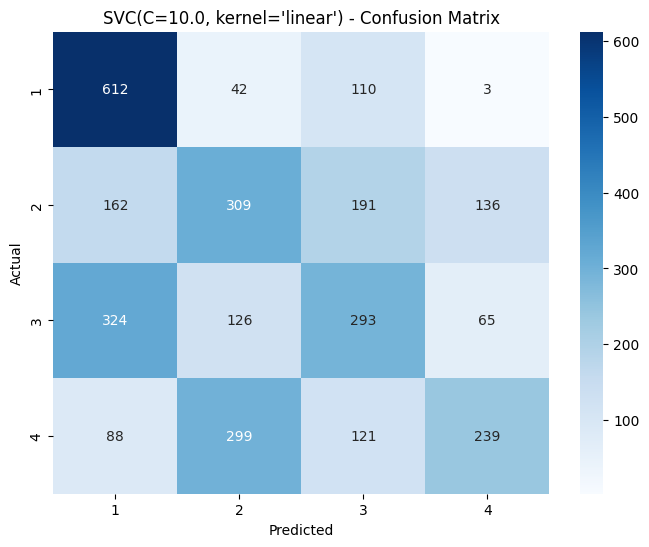

In [ ]:
evaluate_model(y_test,y_pred,svm_linear3)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
x = pd.DataFrame(X_pca)
x

,0,1
0,0.847823,-0.003181
1,0.164527,0.973099
2,0.273083,1.082086
3,0.367420,0.710355
4,0.091199,-0.281907
...,...,...
12475,-0.755408,-2.669261
12476,-0.408228,-0.773141
12477,0.653964,0.415322
12478,-2.007519,-1.099038


In [ ]:
svm_model = SVC(kernel="linear" , C = 10.0)
svm_model.fit(x, y_train)

SVC(C=10.0, kernel='linear')

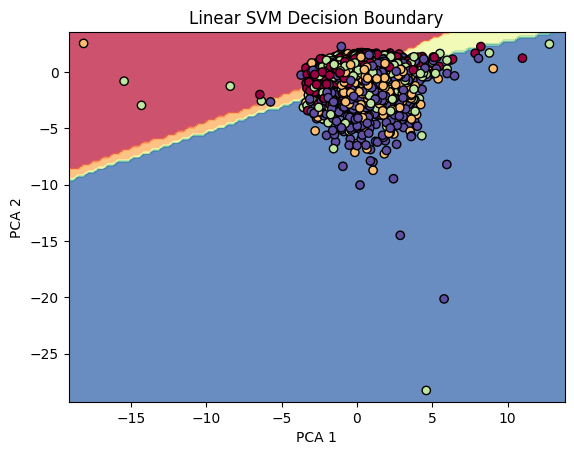

In [ ]:
DecisionBoundaryDisplay.from_estimator(
        svm_model,
        x,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
    )

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k', marker='o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Linear SVM Decision Boundary')
plt.show()

In [ ]:
#Kernal : RBF
svm_rbf = SVC(kernel='rbf', C=1.0)
svm_rbf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_rbf.predict(X_test)

In [ ]:
print(f"{svm_rbf} - Accuracy Score: {accuracy_score(y_test, y_pred)}")

SVC() - Accuracy Score: 0.5125


In [ ]:
svm_rbf2 = SVC(kernel='rbf', C=5.0)
svm_rbf2.fit(X_train, y_train)

SVC(C=5.0)

In [ ]:
y_pred2 = svm_rbf2.predict(X_test)

In [ ]:
print(f"{svm_rbf2} - Accuracy Score: {accuracy_score(y_test, y_pred2)}")

SVC(C=5.0) - Accuracy Score: 0.5221153846153846


In [ ]:
svm_rbf3 = SVC(kernel='rbf', C=10.0)
svm_rbf3.fit(X_train, y_train)

SVC(C=10.0)

In [ ]:
y_pred = svm_rbf3.predict(X_test)

In [ ]:
print(f"{svm_rbf3} - Accuracy Score: {accuracy_score(y_test, y_pred)}")

SVC(C=10.0) - Accuracy Score: 0.521474358974359


SVC(C=5.0) - Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.78      0.65       767
           2       0.48      0.40      0.44       798
           3       0.49      0.41      0.44       808
           4       0.55      0.51      0.53       747

    accuracy                           0.52      3120
   macro avg       0.52      0.52      0.51      3120
weighted avg       0.52      0.52      0.51      3120

SVC(C=5.0) - Accuracy Score: 0.5221153846153846


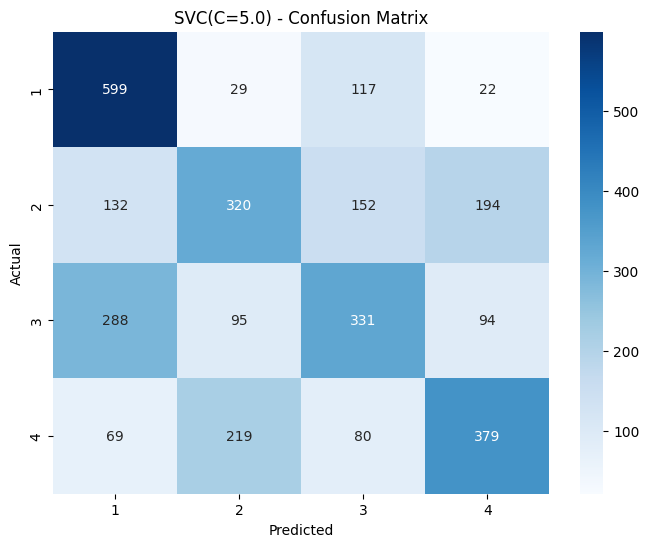

In [ ]:
evaluate_model(y_test,y_pred2,svm_rbf2)

In [ ]:
svm_rbf = SVC(kernel="rbf" , C = 10.0)
svm_rbf.fit(x, y_train)

SVC(C=10.0)

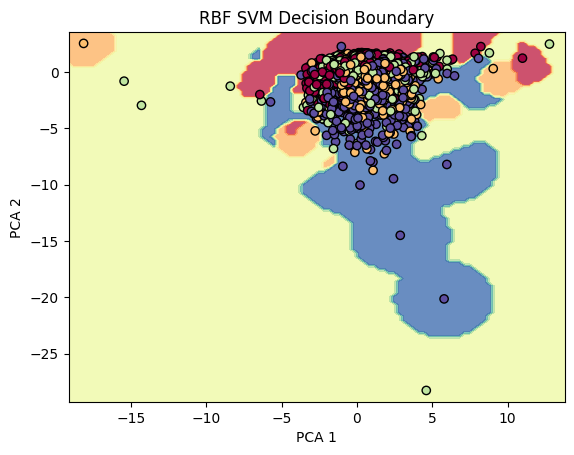

In [ ]:
DecisionBoundaryDisplay.from_estimator(
        svm_rbf,
        x,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
    )

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k', marker='o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('RBF SVM Decision Boundary')
plt.show()

In [ ]:
#Kernal : Poly
svm_poly1 = SVC(kernel='poly', C=1.0)
svm_poly1.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred = svm_poly1.predict(X_test)

In [ ]:
print(f"{svm_poly1} - Accuracy Score: {accuracy_score(y_test, y_pred)}")

SVC(kernel='poly') - Accuracy Score: 0.44711538461538464


In [ ]:
svm_poly2 = SVC(kernel='poly', C=5.0)
svm_poly2.fit(X_train, y_train)

SVC(C=5.0, kernel='poly')

In [ ]:
y_pred = svm_poly2.predict(X_test)

In [ ]:
print(f"{svm_poly2} - Accuracy Score: {accuracy_score(y_test, y_pred)}")

SVC(C=5.0, kernel='poly') - Accuracy Score: 0.4653846153846154


In [ ]:
svm_poly3 = SVC(kernel='poly', C=10.0)
svm_poly3.fit(X_train, y_train)

SVC(C=10.0, kernel='poly')

In [ ]:
y_pred = svm_poly3.predict(X_test)

In [ ]:
print(f"{svm_poly3} - Accuracy Score: {accuracy_score(y_test, y_pred)}")

SVC(C=10.0, kernel='poly') - Accuracy Score: 0.4724358974358974


SVC(C=10.0, kernel='poly') - Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.73      0.62       767
           2       0.41      0.44      0.42       798
           3       0.41      0.44      0.43       808
           4       0.58      0.28      0.38       747

    accuracy                           0.47      3120
   macro avg       0.48      0.47      0.46      3120
weighted avg       0.48      0.47      0.46      3120

SVC(C=10.0, kernel='poly') - Accuracy Score: 0.4724358974358974


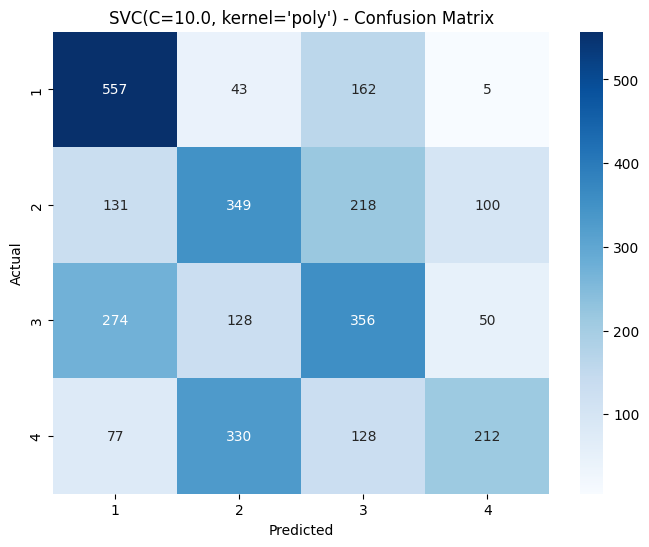

In [ ]:
evaluate_model(y_test,y_pred,svm_poly3)

In [ ]:
svm_poly = SVC(kernel='poly', C=10.0)
svm_poly.fit(x, y_train)

SVC(C=10.0, kernel='poly')

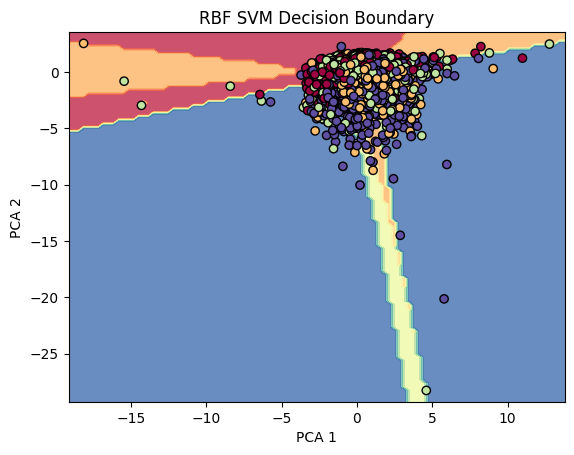

In [ ]:
DecisionBoundaryDisplay.from_estimator(
        svm_poly,
        x,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
    )

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k', marker='o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('RBF SVM Decision Boundary')
plt.show()

Ensemble Learning:

* RandomForest
* AdaBoost
* Bagging
* Gradient Boosting

In [ ]:
#Random Forest Model:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287952 entries, 0 to 287951
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           287952 non-null  int64  
 1   Date               287952 non-null  object 
 2   Start_Time         287952 non-null  object 
 3   End_Time           287952 non-null  object 
 4   Start_Lat          287952 non-null  float64
 5   Start_Lng          287952 non-null  float64
 6   Distance(mi)       287952 non-null  float64
 7   Description        287952 non-null  object 
 8   City               287952 non-null  object 
 9   County             287952 non-null  object 
 10  State              287952 non-null  object 
 11  Zipcode            287952 non-null  object 
 12  Timezone           287952 non-null  object 
 13  Weather_Timestamp  287952 non-null  object 
 14  Temperature(F)     287952 non-null  float64
 15  Humidity(%)        287952 non-null  float64
 16  Pr

In [ ]:
# Convert time columns
undersampled_data["Start_Time"] = pd.to_datetime(undersampled_data["Start_Time"])
undersampled_data["End_Time"] = pd.to_datetime(undersampled_data["End_Time"])
undersampled_data["Accident_Duration"] = (undersampled_data["End_Time"] - undersampled_data["Start_Time"]).dt.total_seconds() / 60  # Duration in minutes

# Extract datetime features
undersampled_data["Hour"] = undersampled_data["Start_Time"].dt.hour
undersampled_data["Day_of_Week"] = undersampled_data["Start_Time"].dt.dayofweek
undersampled_data["Is_Weekend"] = undersampled_data["Day_of_Week"].isin([5, 6]).astype(int)


In [ ]:
# Encode categorical features
encoder = LabelEncoder()
undersampled_data["Weather_Condition"] = encoder.fit_transform(undersampled_data["Weather_Condition"])

In [ ]:
# Convert boolean columns to int
boolean_cols = ["Amenity", "Bump", "Crossing", "Traffic_Signal"]
for col in boolean_cols:
    undersampled_data[col] = undersampled_data[col].astype(int)

In [ ]:
# Feature and target selection
X = undersampled_data[["Temperature(F)", "Humidity(%)",'Pressure(in)','Wind_Speed(mph)', "Visibility(mi)", "Accident_Duration",
        "Hour", "Day_of_Week", "Is_Weekend", "Weather_Condition",
        "Traffic_Signal", "Bump"]]
y = undersampled_data["Severity"]


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10920 entries, 220317 to 38859
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature(F)     10920 non-null  float64
 1   Humidity(%)        10920 non-null  float64
 2   Pressure(in)       10920 non-null  float64
 3   Wind_Speed(mph)    10920 non-null  float64
 4   Visibility(mi)     10920 non-null  float64
 5   Accident_Duration  10920 non-null  float64
 6   Hour               10920 non-null  int32  
 7   Day_of_Week        10920 non-null  int32  
 8   Is_Weekend         10920 non-null  int64  
 9   Weather_Condition  10920 non-null  int64  
 10  Traffic_Signal     10920 non-null  int64  
 11  Bump               10920 non-null  int64  
dtypes: float64(6), int32(2), int64(4)
memory usage: 1023.8 KB


In [ ]:
model = RandomForestClassifier(random_state=42,n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model
print("Feature Importance:", model.feature_importances_)
print("Accuracy on Test Data:", model.score(X_test, y_test))

Feature Importance: [1.42761226e-01 1.23626262e-01 1.44835467e-01 8.94420306e-02
 2.76301941e-02 2.90877840e-01 1.09296464e-01 0.00000000e+00
 0.00000000e+00 3.42424134e-02 3.71544089e-02 1.33693636e-04]
Accuracy on Test Data: 0.5773504273504273


RandomForestClassifier(random_state=42) - Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.75      0.72      1170
           2       0.51      0.42      0.46      1180
           3       0.55      0.58      0.57      1186
           4       0.53      0.56      0.55      1144

    accuracy                           0.58      4680
   macro avg       0.57      0.58      0.57      4680
weighted avg       0.57      0.58      0.57      4680

RandomForestClassifier(random_state=42) - Accuracy Score: 0.5773504273504273


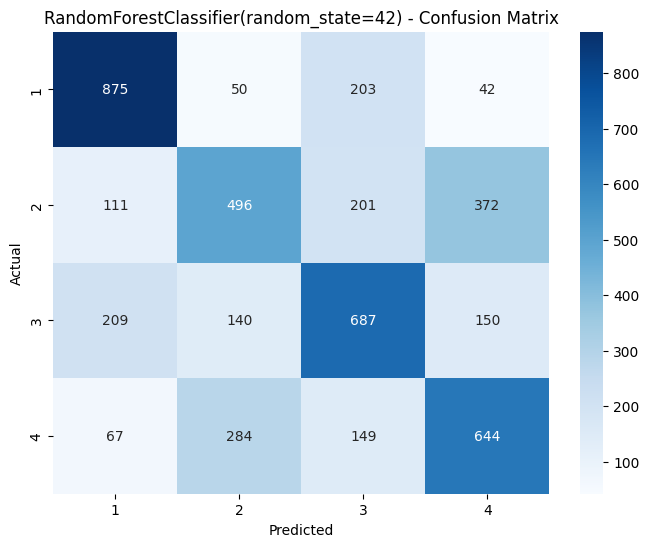

In [ ]:
evaluate_model(y_test,y_pred,model)

In [ ]:
# Initialize AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

AdaBoostClassifier(n_estimators=100, random_state=42) - Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.73      0.71      1170
           2       0.45      0.41      0.43      1180
           3       0.56      0.57      0.57      1186
           4       0.52      0.54      0.53      1144

    accuracy                           0.56      4680
   macro avg       0.56      0.56      0.56      4680
weighted avg       0.56      0.56      0.56      4680

AdaBoostClassifier(n_estimators=100, random_state=42) - Accuracy Score: 0.5604700854700855


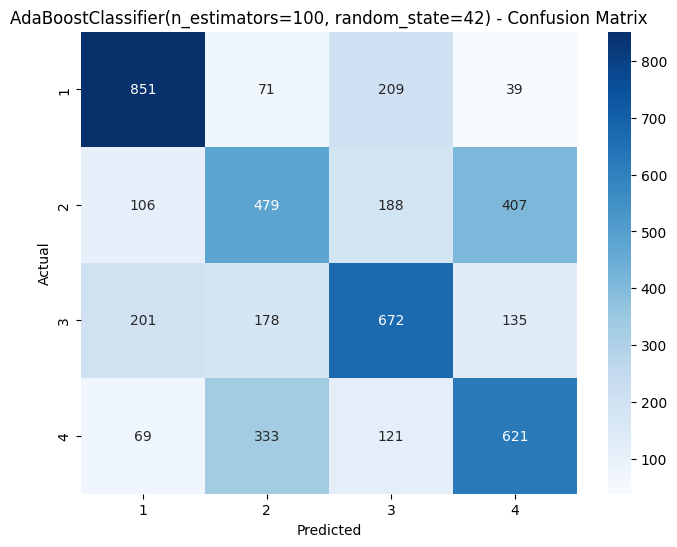

In [ ]:
evaluate_model(y_test,y_pred_adaboost,adaboost_model)

In [ ]:
# Initialize Bagging Classifier (with Decision Tree as estimator)
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [ ]:
# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42) - Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.77      0.73      1170
           2       0.50      0.46      0.48      1180
           3       0.58      0.59      0.58      1186
           4       0.54      0.53      0.53      1144

    accuracy                           0.59      4680
   macro avg       0.58      0.59      0.58      4680
weighted avg       0.58      0.59      0.58      4680

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42) - Accuracy Score: 0.5854700854700855


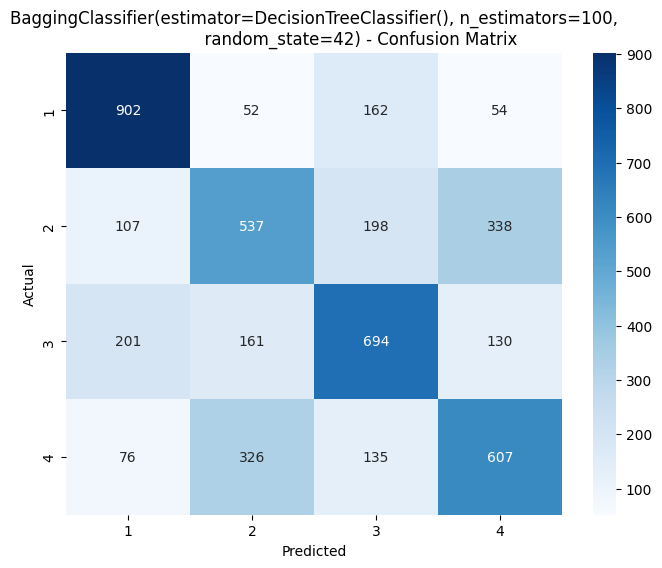

In [ ]:
evaluate_model(y_test,y_pred_bagging,bagging_model)

In [ ]:
# Initialize Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_gb = gradient_boosting_model.predict(X_test)

GradientBoostingClassifier(random_state=42) - Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.75      0.73      1170
           2       0.51      0.44      0.48      1180
           3       0.57      0.59      0.58      1186
           4       0.56      0.58      0.57      1144

    accuracy                           0.59      4680
   macro avg       0.59      0.59      0.59      4680
weighted avg       0.59      0.59      0.59      4680

GradientBoostingClassifier(random_state=42) - Accuracy Score: 0.5916666666666667


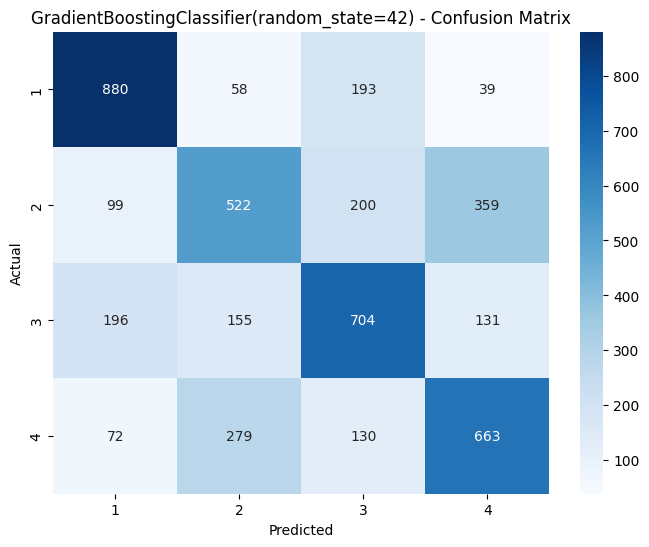

In [ ]:
evaluate_model(y_test,y_pred_gb,gradient_boosting_model)